### Finding Common Charges

The goal of this exercise is to find the most common charges seen when the beam is on. 

This will involve: 
1. pulling data from the accelerator during beam time for the PV "TORO:GUNB:360:CHRG"
2. identify clusters with an algorithm
3. plot bar chart of clusters with pC as the y-axis

### Cluster finding algorithm ###
- sort all charge values
- start with first value and calculate the tolerance amount 
- for each following value, check if it's within the tolerance amount. If it is, add to a cluster list. If not, create a new list, add it to that, and let it be the new comparison. 
- repeat the previous step with this new comparison point
- repeat until all datapoints have been emptied from the dataset

In [6]:
def cluster(vals, tolerance) -> list: 
    vals.sort()
    
    clusters = [[]]
    cluster_index = 0
    while len(vals) > 0:
        comparison = vals.pop(0)
        clusters[cluster_index].append(comparison)
        for i in range(len(vals)):
            next_val = vals.pop(0)
            if abs(next_val - comparison) <= (tolerance * comparison):  # if next_val is within percentage of comparison's value
                clusters[cluster_index].append(next_val)  # add next_val to cluster
            else:
                cluster_index += 1
                clusters.append([])  # add a new empty list
                clusters[cluster_index].append(next_val)  # add next_val to the next cluster
                break
    
    return clusters

In [7]:
# cluster algorithm demo
vals_unsorted = [100.0, 100.5, 100.2, 99.8, 100.4, 100.1, 100.3, 
                 110.0, 109.5, 109.8, 109.9, 110.2, 109.7, 110.1, 
                 120.0, 119.5, 119.8, 119.9, 120.2, 119.7, 120.1, 
                 130.0, 130.5, 130.2, 129.8, 130.4, 130.1, 130.3, 
                 150.0, 149.5, 149.8, 149.9, 150.2, 149.7, 150.1, 
                 200.0, 199.5, 199.8, 199.9, 200.2, 199.7, 200.1, 
                 300.0, 300.5, 300.2, 299.8, 300.4, 300.1, 300.3,
                 400.0, 399.5, 399.8, 399.9, 400.2, 399.7, 400.1,
                 600.0, 600.5, 600.2, 599.8, 600.4, 600.1, 600.3,
                 800.0, 799.5, 799.8, 799.9, 800.2, 799.7, 800.1,
                 1000.0, 1000.5, 1000.2, 999.8, 1000.4, 1000.1, 1000.3,
                 1600.0, 1599.5, 1599.8, 1599.9, 1600.2, 1599.7, 1600.1,
                 2500.0, 2500.5, 2500.2, 2499.8, 2500.4, 2500.1, 2500.3,
                 3500.0, 3499.5, 3499.8, 3499.9, 3500.2, 3499.7, 3500.1,
                 5000.0, 5000.5, 5000.2, 4999.8, 5000.4, 5000.1, 5000.3,
                 8000.0, 7999.5, 7999.8, 7999.9, 8000.2, 7999.7, 8000.1,
                 13000.0, 13000.5, 13000.2, 12999.8, 13000.4, 13000.1, 13000.3,
                 21000.0, 21000.5, 21000.2, 20999.8, 21000.4, 21000.1, 21000.3,
                 34000.0, 34000.5, 34000.2, 33999.8, 34000.4, 34000.1, 34000.3,
                 55000.0, 55000.5, 55000.2, 54999.8, 55000.4, 55000.1, 55000.3,
                 89000.0, 89000.5, 89000.2, 88999.8, 89000.4, 89000.1, 89000.3,
                 144000.0, 144000.5, 144000.2, 143999.8, 144000.4, 144000.1, 144000.3,
                 233000.0, 233000.5, 233000.2, 232999.8, 233000.4, 233000.1, 233000.3,
                 377000.0, 377000.5, 377000.2, 376999.8, 377000.4, 377000.1, 377000.3,
                 610000.0, 610000.5, 610000.2, 609999.8, 610000.4, 610000.1, 610000.3,
                 987000.0, 987000.5, 987000.2, 986999.8, 987000.4, 987000.1, 987000.3,
                 1597000.0, 1597000.5, 1597000.2, 1596999.8, 1597000.4, 1597000.1, 1597000.3,
                 2584000.0, 2584000.5, 2584000.2, 2583999.8, 2584000.4, 2584000.1, 2584000.3,
                 4171000.0, 4171000.5, 4171000.2, 4170999.8, 4171000.4, 4171000.1, 4171000.3,
                 6755000.0, 6755000.5, 6755000.2, 6754999.8, 6755000.4, 6755000.1, 6755000.3,
                 10926000.0, 10926000.5, 10926000.2, 10925999.8, 10926000.4, 10926000.1, 10926000.3,
                 17681000.0, 17681000.5, 17681000.2, 17680999.8, 17681000.4, 17681000.1, 17681000.3,
                 28607000.0, 28607000.5, 28607000.2, 28606999.8, 28607000.4, 28607000.1, 28607000.3,
                 46288000.0, 46288000.5, 46288000.2, 46287999.8, 46288000.4, 46288000.1, 46288000.3,
                 74995000.0, 74995000.5, 74995000.2, 74994999.8, 74995000.4, 74995000.1, 74995000.3,
                 121283000.0, 121283000.5, 121283000.2, 121282999.8, 121283000.4, 121283000.1, 121283000.3,
                 196278000.0, 196278000.5, 196278000.2, 196277999.8, 196278000.4, 196278000.1, 196278000.3,
                 317561000.0, 317561000.5, 317561000.2, 317560999.8, 317561000.4, 317561000.1, 317561000.3,
                 513839000.0, 513839000.5, 513839000.2, 513838999.8, 513839000.4, 513839000]

val_tolerance = 0.05
print(len(vals_unsorted))
cluster(vals_unsorted, val_tolerance)

272


[[99.8, 100.0, 100.1, 100.2, 100.3, 100.4, 100.5],
 [109.5, 109.7, 109.8, 109.9, 110.0, 110.1, 110.2],
 [119.5, 119.7, 119.8, 119.9, 120.0, 120.1, 120.2],
 [129.8, 130.0, 130.1, 130.2, 130.3, 130.4, 130.5],
 [149.5, 149.7, 149.8, 149.9, 150.0, 150.1, 150.2],
 [199.5, 199.7, 199.8, 199.9, 200.0, 200.1, 200.2],
 [299.8, 300.0, 300.1, 300.2, 300.3, 300.4, 300.5],
 [399.5, 399.7, 399.8, 399.9, 400.0, 400.1, 400.2],
 [599.8, 600.0, 600.1, 600.2, 600.3, 600.4, 600.5],
 [799.5, 799.7, 799.8, 799.9, 800.0, 800.1, 800.2],
 [999.8, 1000.0, 1000.1, 1000.2, 1000.3, 1000.4, 1000.5],
 [1599.5, 1599.7, 1599.8, 1599.9, 1600.0, 1600.1, 1600.2],
 [2499.8, 2500.0, 2500.1, 2500.2, 2500.3, 2500.4, 2500.5],
 [3499.5, 3499.7, 3499.8, 3499.9, 3500.0, 3500.1, 3500.2],
 [4999.8, 5000.0, 5000.1, 5000.2, 5000.3, 5000.4, 5000.5],
 [7999.5, 7999.7, 7999.8, 7999.9, 8000.0, 8000.1, 8000.2],
 [12999.8, 13000.0, 13000.1, 13000.2, 13000.3, 13000.4, 13000.5],
 [20999.8, 21000.0, 21000.1, 21000.2, 21000.3, 21000.4, 21000.

In [112]:
# pull TORO:GUNB:360:CHRG data from the accelerator and convert to a list of charges

# imports
import sys
sys.path.append('/Users/jonathontordilla/Desktop/hombom24/archive-analysis/lcls-tools-plots/lcls_tools') # path to tools 
import common.data_analysis.archiver as arch # type: ignore
from datetime import datetime
# specify timeframe with a datetime object
start_date = "2024/07/02 14:42:36"
end_date = "2024/07/02 15:42:36" 
format_string = "%Y/%m/%d %H:%M:%S"
start_date_obj = datetime.strptime(start_date, format_string)
end_date_obj = datetime.strptime(end_date, format_string)
# submit request with a list of PVs
data = arch.get_values_over_time_range(["TORO:GUNB:360:CHRG"], start_date_obj, end_date_obj)
chrg_dict = data["TORO:GUNB:360:CHRG"]
chrg_vals = chrg_dict.values # list 
print(chrg_vals)

[0.6768124103546143, 0.6533117890357971, 0.512330949306488, 0.5097566246986389, 0.5277981758117676, 0.4050768315792084, 0.5111626386642456, 0.38964012265205383, 0.4690616726875305, 0.40671783685684204, 0.014045698568224907, 0.4431437849998474, 0.38937631249427795, 0.48151662945747375, 0.5798130631446838, 0.5018803477287292, 0.2573322653770447, 0.29974523186683655, 0.4080764353275299, 0.023350529372692108, 0.034061793237924576, 0.020000746473670006, 0.03506116196513176, 0.023521985858678818, 0.022689834237098694, 0.04380612075328827, 0.03397207707166672, 0.050164856016635895, 0.03249223902821541, 0.008525515906512737, 0.014801925048232079, 0.018107909709215164, 0.02968299202620983, 0.013969103805720806, 0.011262034066021442, 0.02021060883998871, 0.02111533284187317, 0.016757717356085777, 0.013478212989866734, 0.021267838776111603, 0.011468281038105488, 0.03072083368897438, 0.03951516002416611, 0.013428720645606518, 0.01464989222586155, 0.028411803767085075, 0.026864130049943924, 0.02311

In [113]:
# cluster and print charge data
charge_tolerance = 0.05
charge_clusters = cluster(chrg_vals, charge_tolerance)
print(charge_clusters)
len(charge_clusters)

[[0.007796282414346933], [0.008379083126783371, 0.008525515906512737, 0.008643841370940208], [0.009232685901224613, 0.009375389665365219, 0.00937678199261427, 0.009420190006494522, 0.009446137584745884, 0.009571678936481476, 0.009726743213832378], [0.009963360615074635, 0.010240324772894382, 0.010300139896571636, 0.01035875454545021, 0.010415450669825077, 0.01061808317899704, 0.01065809652209282], [0.010965881869196892, 0.01105970237404108, 0.011125271208584309, 0.011180619709193707, 0.01122649759054184, 0.011262034066021442, 0.01134533528238535, 0.011398899368941784, 0.011409829370677471, 0.011468281038105488], [0.011763587594032288, 0.011816919781267643, 0.011874648742377758, 0.011878140270709991, 0.011998236179351807, 0.012231742031872272, 0.012315516360104084], [0.012451864778995514, 0.012508376501500607, 0.012630271725356579, 0.01271043624728918, 0.012993290089070797, 0.01305442489683628], [0.013137174770236015, 0.013310723938047886, 0.013373497873544693, 0.013397353701293468, 0.0

42

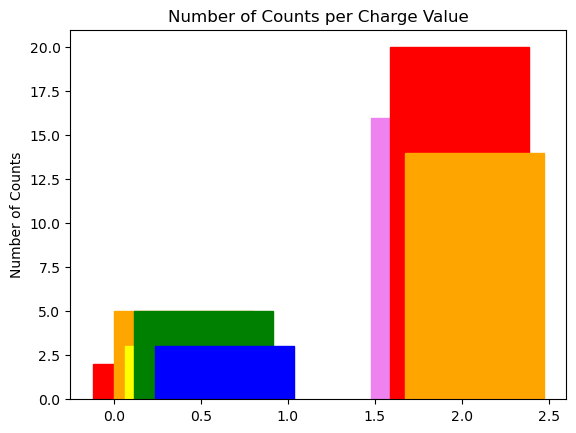

In [132]:
# plot a bar chart of clusters
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()

# filter out charge values less than 0.1 and greater than 3.0
plot_charge_clusters = [cluster for cluster in charge_clusters if 0.1 < float(np.mean(cluster)) < 50.0]

values = [float(np.mean(plot_charge_clusters[i])) for i in range(len(plot_charge_clusters))] 
counts = [len(plot_charge_clusters[i]) for i in range(len(plot_charge_clusters))]
bars = ax.bar(values, counts)
colors = ["red", "orange", "yellow", "green", "blue", "violet"]
for i in range(len(bars)):
    bars[i].set_color(colors[i % len(colors)])

ax.set_ylabel('Number of Counts')
ax.set_title('Number of Counts per Charge Value')
plt.show()

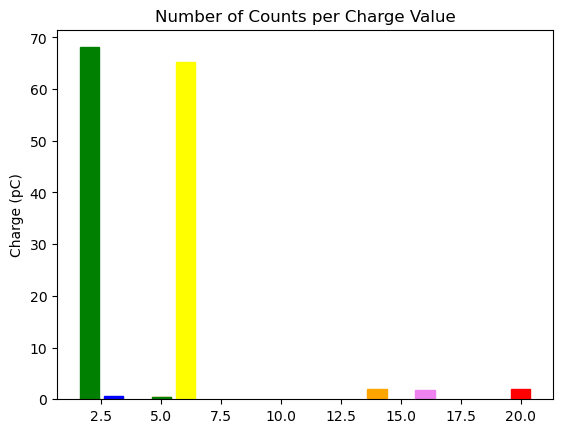

In [147]:
fig, ax = plt.subplots()

# filter out charge values less than 0.1 and greater than 3.0
plot_charge_clusters = [cluster for cluster in charge_clusters if 0.1 < float(np.mean(cluster))]

counts = [float(np.mean(plot_charge_clusters[i])) for i in range(len(plot_charge_clusters))] 
values = [len(plot_charge_clusters[i]) for i in range(len(plot_charge_clusters))]
bars = ax.bar(values, counts)
colors = ["red", "orange", "yellow", "green", "blue", "violet"]
for i in range(len(bars)):
    bars[i].set_color(colors[i % len(colors)])

ax.set_ylabel('Charge (pC)')
ax.set_title('Number of Counts per Charge Value')
plt.show()

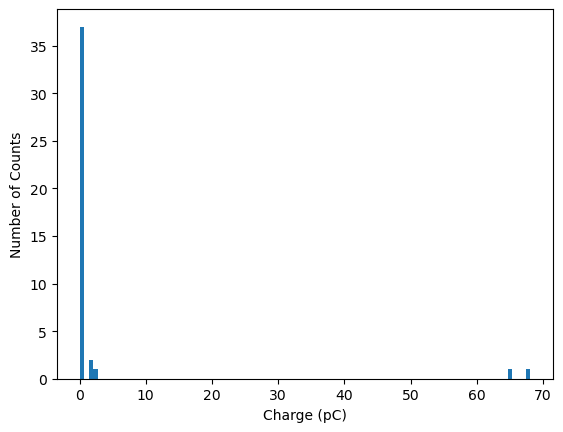

In [148]:
fig, ax = plt.subplots()

values = [float(np.mean(charge_clusters[i])) for i in range(len(charge_clusters))] 
counts = [len(charge_clusters[i]) for i in range(len(charge_clusters))]
ax.hist(values, bins=100)
ax.set_ylabel('Number of Counts')
ax.set_xlabel('Charge (pC)')
plt.show()

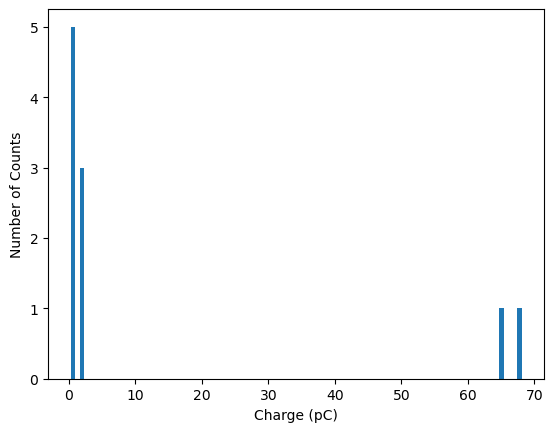

In [151]:
fig, ax = plt.subplots()

values = [float(np.mean(plot_charge_clusters[i])) for i in range(len(plot_charge_clusters))] 
counts = [len(plot_charge_clusters[i]) for i in range(len(plot_charge_clusters))]

ax.hist(values, bins=100)
ax.set_ylabel('Number of Counts')
ax.set_xlabel('Charge (pC)')
plt.show()

In [150]:
print(values)

[0.2785387486219406, 0.3997775077819824, 0.4645740290482839, 0.5125857472419739, 0.6366457541783651, 1.8790562972426414, 1.9854518473148346, 2.0720774275915965, 65.15696843465169, 68.09078216552734]
